In [14]:
#import packages   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#Applying logistic regression on MNIST dataset
data = pd.read_csv('mnist_test.csv')
print(data.head())
print(data.shape)
print(data.columns)


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(10000, 785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x

In [16]:
#Data Preprocessing
#Checking for null values
print(data.isnull().sum())

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


In [17]:
#Find unique values of label field
data.groupby('label').size()

label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

In [18]:
data = data[(data['label']==0) | (data['label']==1)]

In [19]:
#Convert data into numpy arrays
data = data.values
print(data)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [36]:
#Splitting data into X and Y
X = data[:,1:]
Y = data[:,0]
print(X.shape,Y.shape)
#Standardize X's
X = (X-np.mean(X))/np.std(X)

(2115, 784) (2115,)


In [37]:
#Split into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1586, 784) (529, 784) (1586,) (529,)


In [38]:
#stacking 1's in X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
#reshaping Y_train and Y_test
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


In [39]:
#implement logistic regression
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#hypothesis function
def hypothesis(theta, x):
    return sigmoid(np.dot(x, theta))
#cost function
def cost_function(theta, x, y):
    m = x.shape[0]
    y_ = hypothesis(theta, x)
    cost = np.mean(y*np.log(y_) + (1-y)*np.log(1-y_))
    return -cost
#gradeint function
def gradient(theta, x, y):
    m = x.shape[0]
    y_ = hypothesis(theta, x)
    grad = np.dot(x.T, (y - y_))
    return grad/m
#gradient descent function
def gradient_descent(x, y, learning_rate=0.0001, max_iters=1000):
    n = x.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    for i in range(max_iters):
        err = cost_function(theta, x, y)
        error_list.append(err)
        grad = gradient(theta, x, y)
        theta = theta + learning_rate*grad
    return theta, error_list



In [40]:
#Training the model
theta, error_list = gradient_descent(X_train, Y_train)


In [41]:
error_list

[0.6931471805599451,
 0.6892867278607566,
 0.6854602870256092,
 0.6816675343608346,
 0.6779081477307268,
 0.6741818066242631,
 0.6704881922187028,
 0.666826987440127,
 0.6631978770209649,
 0.659600547554568,
 0.6560346875468928,
 0.652499987465347,
 0.6489961397848687,
 0.645522839031294,
 0.6420797818220843,
 0.6386666669044768,
 0.6352831951911203,
 0.6319290697932689,
 0.6286039960515977,
 0.625307681564706,
 0.6220398362153801,
 0.6188001721946783,
 0.6155884040239068,
 0.6124042485745552,
 0.609247425086254,
 0.6061176551828238,
 0.603014662886479,
 0.5999381746302506,
 0.5968879192686932,
 0.5938636280869375,
 0.5908650348081508,
 0.5878918755994663,
 0.5849438890764413,
 0.582020816306103,
 0.579122400808638,
 0.5762483885577849,
 0.5733985279799829,
 0.5705725699523306,
 0.567770267799408,
 0.5649913772890147,
 0.5622356566268719,
 0.5595028664503379,
 0.5567927698211864,
 0.5541051322174915,
 0.5514397215246654,
 0.5487963080256928,
 0.5461746643906037,
 0.5435745656652256,
 0

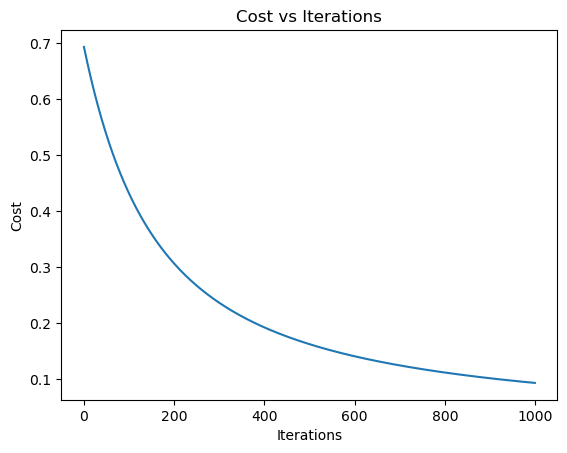

In [42]:
#plot cost vs iterations
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

In [45]:
#predicting the values
def predict(theta, x):
    y_ = hypothesis(theta, x)
    output = np.zeros(y_.shape)
    output[y_>=0.5] = 1
    output = output.astype('int')
    return output
#accuracy
def accuracy(actual, pred):
    actual = actual.astype('int')
    acc = np.sum(actual==pred)/actual.shape[0]
    return acc*100

#accuracy on training data
Y_train_pred = predict(theta, X_train)
train_accuracy = accuracy(Y_train, Y_train_pred)
print("Training accuracy", train_accuracy)




Training accuracy 99.62168978562421
Test accuracy 100.0


In [46]:
#Training the model
theta, error_list = gradient_descent(X_test, Y_test)

In [47]:
#accuracy on test data
Y_test_pred = predict(theta, X_test)
test_accuracy = accuracy(Y_test, Y_test_pred)
print("Test accuracy", test_accuracy)

Test accuracy 100.0
